<a href="https://colab.research.google.com/github/PaulToronto/DataCamp-Track---Machine-Learning-Scientist-in-Python/blob/main/3_2_Unsupervised_Learning_in_Python_Visualization_with_Hierarchical_Clustering_and_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3-2 Unsupervised Learning in Python - Visualization with Hierarchical Clustering and t-SNE

## Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, normalize, LabelEncoder
from sklearn.manifold import TSNE

## Data

In [2]:
data_base_url = 'https://drive.google.com/uc?id='
image_base_url = 'https://drive.google.com/uc?export=view&id='

### Eurovision scoring dataset

https://eurovision.tv/history/full-split-results

In [3]:
id = '1rGY7U9BuQrbqh-K03E-lgNT_0Q_100sd'
eurovision = pd.read_csv(data_base_url + id)
eurovision.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   From country     1066 non-null   object 
 1   To country       1066 non-null   object 
 2   Jury A           1066 non-null   int64  
 3   Jury B           1066 non-null   int64  
 4   Jury C           1066 non-null   int64  
 5   Jury D           1066 non-null   int64  
 6   Jury E           1066 non-null   int64  
 7   Jury Rank        1066 non-null   int64  
 8   Televote Rank    1066 non-null   int64  
 9   Jury Points      420 non-null    float64
 10  Televote Points  420 non-null    float64
dtypes: float64(2), int64(7), object(2)
memory usage: 91.7+ KB


### Grain data

In [4]:
data_url = 'https://drive.google.com/uc?id=1-sfcYNfZ3bC2K5AesWHcDiPiqTo1S_ie'
seeds = pd.read_csv(data_url, header=None)
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       210 non-null    float64
 1   1       210 non-null    float64
 2   2       210 non-null    float64
 3   3       210 non-null    float64
 4   4       210 non-null    float64
 5   5       210 non-null    float64
 6   6       210 non-null    float64
 7   7       210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


### Stock Movement

In [5]:
data_url = 'https://drive.google.com/uc?id=1tcU2IA8NDoWO-0LHbaOSYayB3_Kw7Wlc'
stock_movement = pd.read_csv(data_url)
stock_movement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Columns: 964 entries, Unnamed: 0 to 2013-10-29
dtypes: float64(963), object(1)
memory usage: 452.0+ KB


In [6]:
stock_movement = stock_movement.rename(columns={stock_movement.columns[0]: 'Company'})
stock_movement.head()

,Company,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


## Visualizing hierarchies

### Visualization communicates insight

- **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: Create a 2D map of a dataset
    - Conveys useful imformation about the proximity of the samples to one anther
- **Hierarchical clustering**: Arranges samples into a hierarchy of clusters

### A hierarchy of groups

- Groups of living things can form a hierarchy
- Clusters are contained in one another
- Can organize any sort of data into a hierarchy (not just samples plants and animals)

### Eurovision scoring

- Countries gave scores to songs performed at the Eurovision 2016
- 2D array of scores

### Dendogram

- Hierarchical clustering of voting customers

<img src='https://drive.google.com/uc?export=view&id=1o7KutSR-JCkQEFJWb2iRoQE_8a9JGKPp'/>


### How does hierarchical clustering work?

- Every country begins in a separate cluster
- At each step, the two closest clusters are merged
- Continue until all countries in a single cluster
- This is called **agglomerative heirarchical clustering**
- The entire process of the clustering is encoded in the dendogram
    - At the bottom, each country is in a cluster of its own
    - The clustering then proceeds from the bottom up
    - Clusters are represented as vertical lines, and joining of vertical lines indicates a merging of clusters

### Hierarchial clustering with `scipy`

- Given `samples` (the array of scores), and `country_names`

```python
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendogram

# the linkage functionm performs the hierarchical clustering
mergings = linkage(samples, method='complete')

dendogram(mergings,
          labels=country_names,
          leaf_rotation=90,
          leaf_font_size=6)
          
plt.show()
```

### How many merges?

- With $n$ data samples, there would be $n - 1$ merges.

## Understanding mergings

The `mergings` array has shape $(n - 1, 4)$ where $n$ is the number of original data points in `samples`

- Column 0: Index of the first cluster being merged
- Column 1: Index of the second cluster being merged
- Column 2: Distance (linkage criterion) between the two merged clusters
- Column 3: Number of original samples (data points) contained in the new cluster after merging

In [7]:
# Example data (4 samples with 2 features each)
samples = np.array([
    [1.0, 2.0], # Index 0
    [1.5, 1.8], # Index 1
    [5.0, 8.0], # Index 2
    [8.0, 8.0]  # Index 3
])

mergings = linkage(samples, method='complete')
mergings

array([[0.        , 1.        , 0.53851648, 2.        ],
       [2.        , 3.        , 3.        , 2.        ],
       [4.        , 5.        , 9.21954446, 4.        ]])

In [8]:
col0 = samples[0]
col1 = samples[1]
col2 = samples[2]
col3 = samples[3]

# Eucliean distance
np.linalg.norm(col0 - col1), np.linalg.norm(col2 - col3)

(0.5385164807134504, 3.0)

In [9]:
cluster4 = samples[0:2]
cluster5 = samples[2:]
cluster4, cluster5

(array([[1. , 2. ],
        [1.5, 1.8]]),
 array([[5., 8.],
        [8., 8.]]))

In [10]:
distance_a1 = np.linalg.norm(cluster4[0] - cluster5[0])
distance_a2 = np.linalg.norm(cluster4[0] - cluster5[1])
distance_b1 = np.linalg.norm(cluster4[1] - cluster5[0])
distance_b2 = np.linalg.norm(cluster4[1] - cluster5[1])
distance_a1, distance_a2, distance_b1, distance_b2

(7.211102550927978, 9.219544457292887, 7.119691004531026, 8.98276126811795)

In [11]:
np.max([distance_a1, distance_a2, distance_b1, distance_b2])

9.219544457292887

In [12]:
# Loop over each point in cluster4
distance_matrix = []
for a in cluster4:
    row_distances = []  # Store distances for this row
    for b in cluster5:
        distance = np.linalg.norm(a - b)  # Compute Euclidean distance
        row_distances.append(distance)   # Append distance to row
    distance_matrix.append(row_distances)  # Append row to matrix

# Convert list of lists to NumPy array
distances = np.array(distance_matrix)

# Compute Complete Linkage distance (maximum distance in matrix)
max_distance = np.max(distances)

# Print results
print("Pairwise Distance Matrix:\n", distances)
print("Complete Linkage Distance:", max_distance)

Pairwise Distance Matrix:
 [[7.21110255 9.21954446]
 [7.119691   8.98276127]]
Complete Linkage Distance: 9.219544457292887


In [13]:
distances = np.array([[np.linalg.norm(a - b) for b in cluster5] for a in cluster4])
distances, np.max(distances)

(array([[7.21110255, 9.21954446],
        [7.119691  , 8.98276127]]),
 9.219544457292887)

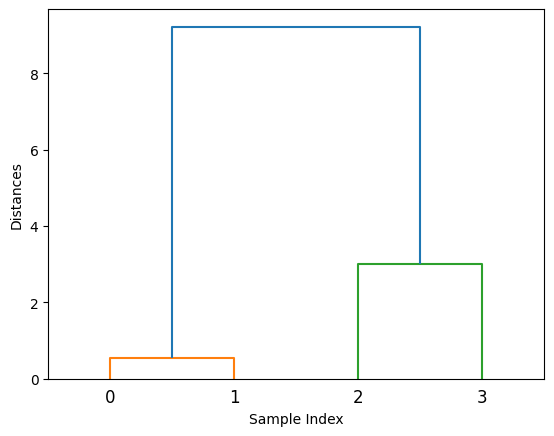

In [14]:
dendrogram(mergings,
           labels=[0, 1, 2, 3],
           leaf_rotation=0,
           leaf_font_size=12)

plt.ylabel('Distances')
plt.xlabel('Sample Index')
plt.show()

- For the indices, the numbers from $0$ to $n - 1$ correspond to the rows in `samples`
- New clusters are assigned starting at $n$, then $n + 1$, etc.
- This continues until all data points are merged into **one final cluster**

### Hierarchical clustering of grain data

In [15]:
X = seeds.iloc[:, 0:-1].to_numpy()
y = seeds.iloc[:, -1].to_numpy()
X.shape, y.shape

((210, 7), (210,))

In [16]:
# easier to view a dendogram with less data
_, samples, _, varieties = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
samples.shape, varieties.shape

((42, 7), (42,))

In [17]:
mapping = {1: 'Kama wheat', 2: 'Rosa wheat', 3: 'Canadian wheat'}

varieties = np.vectorize(mapping.get)(varieties)
varieties

array(['Kama wheat', 'Canadian wheat', 'Rosa wheat', 'Canadian wheat',
       'Rosa wheat', 'Canadian wheat', 'Rosa wheat', 'Kama wheat',
       'Rosa wheat', 'Rosa wheat', 'Kama wheat', 'Canadian wheat',
       'Rosa wheat', 'Rosa wheat', 'Canadian wheat', 'Kama wheat',
       'Canadian wheat', 'Kama wheat', 'Canadian wheat', 'Kama wheat',
       'Kama wheat', 'Canadian wheat', 'Rosa wheat', 'Kama wheat',
       'Rosa wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat',
       'Canadian wheat', 'Kama wheat', 'Canadian wheat', 'Rosa wheat',
       'Kama wheat', 'Canadian wheat', 'Canadian wheat', 'Rosa wheat',
       'Rosa wheat', 'Rosa wheat', 'Canadian wheat', 'Kama wheat',
       'Canadian wheat', 'Rosa wheat'], dtype='<U14')

In [18]:
mergings = linkage(samples, method='complete')
type(mergings), mergings.shape

(numpy.ndarray, (41, 4))

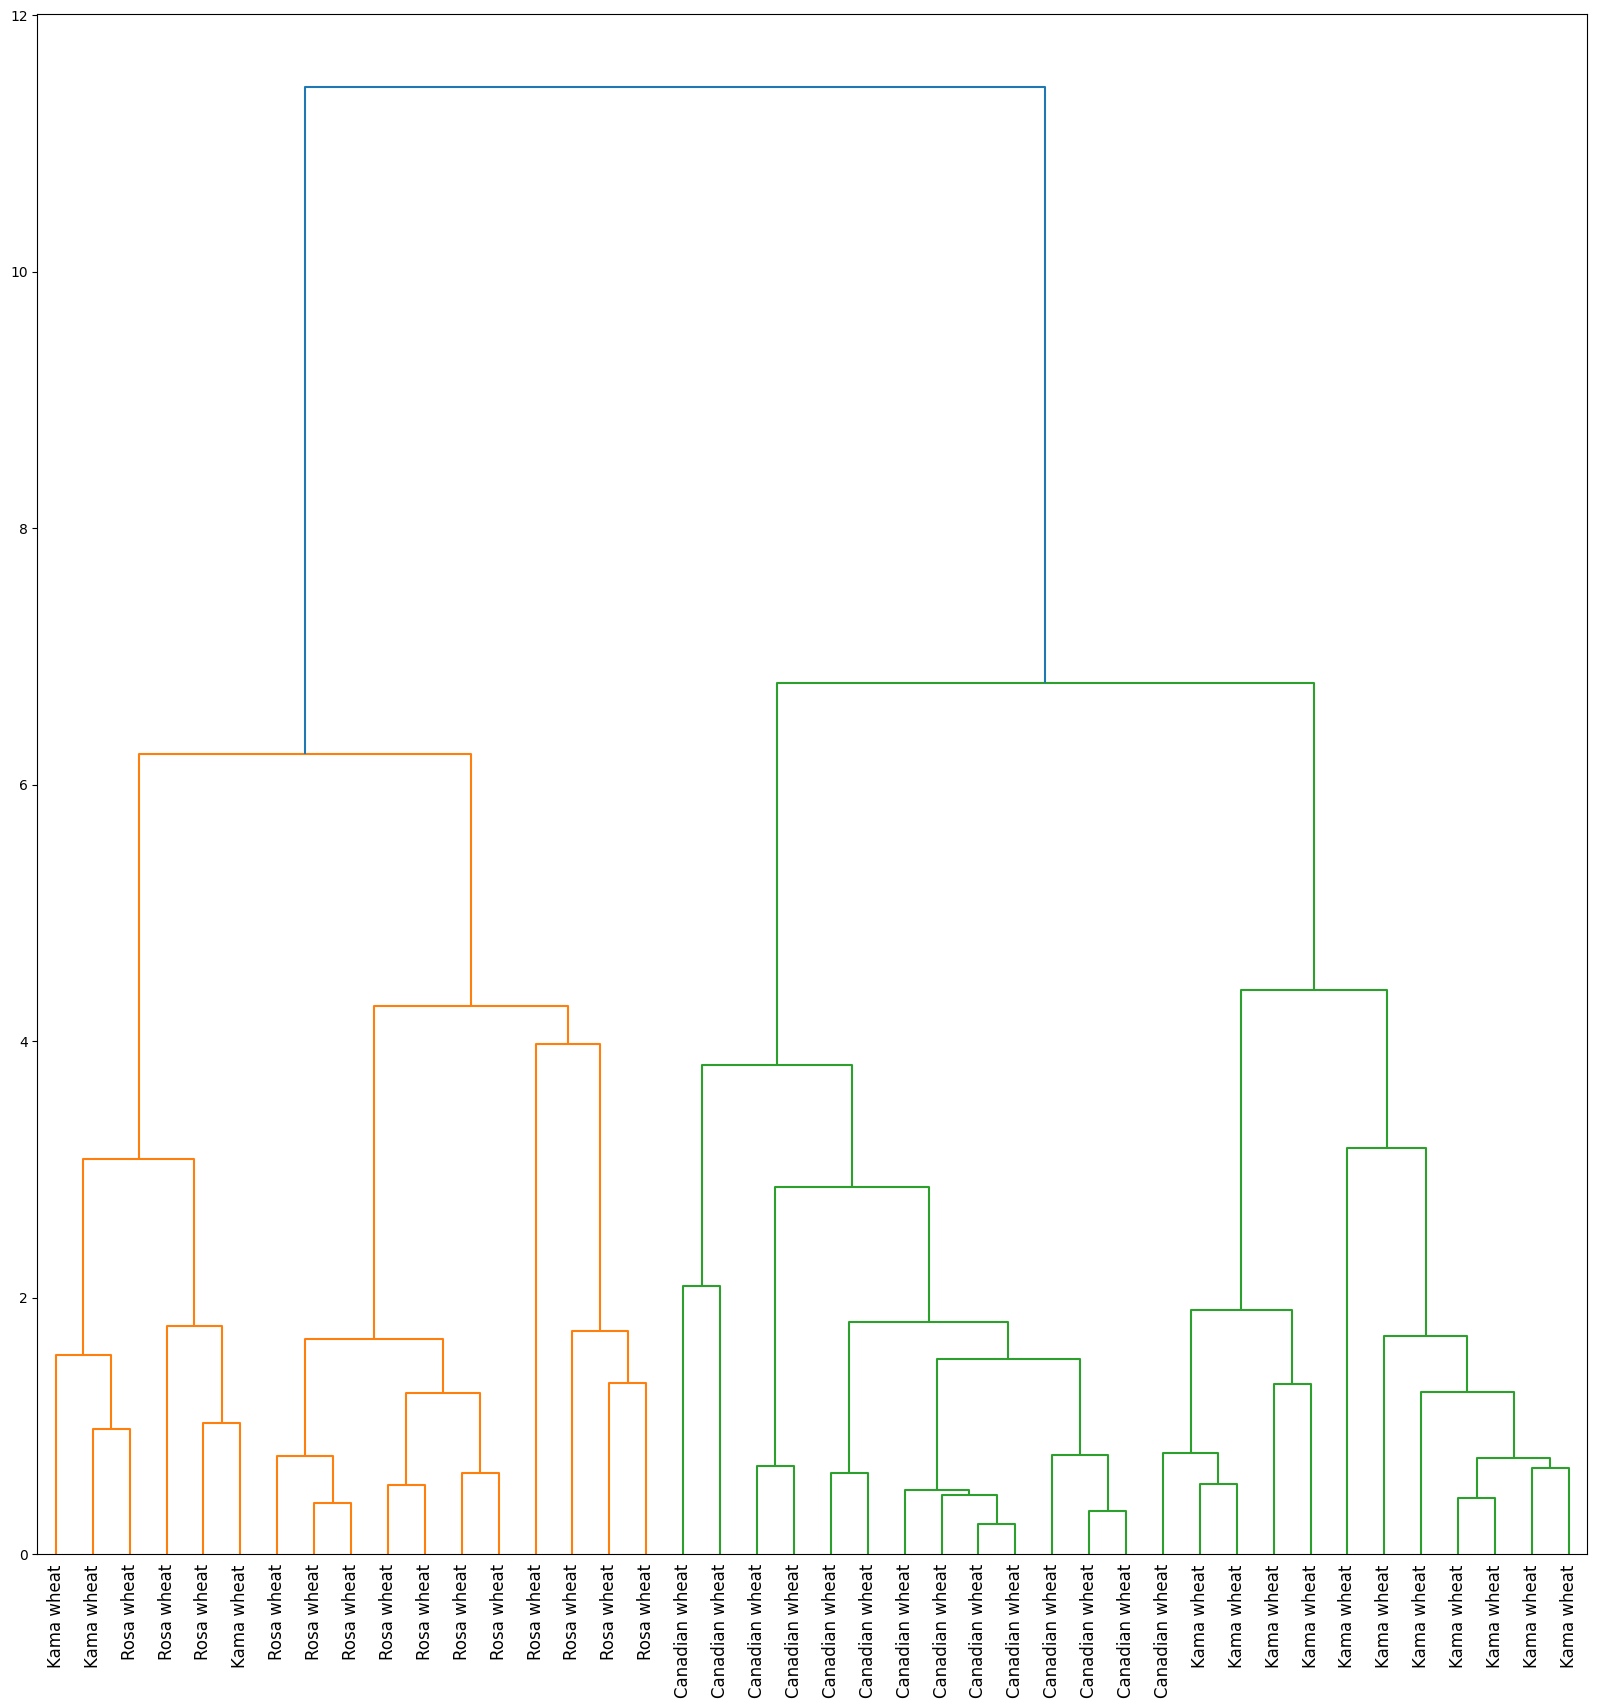

In [19]:
plt.figure(figsize=(20, 20))

dendrogram(
    mergings,
    labels=varieties,
    leaf_rotation=90,
    leaf_font_size=12
)

plt.show()

### Hierarchies of stocks

In [20]:
movements = stock_movement.iloc[:, 1:].to_numpy()
companies = stock_movement['Company'].to_numpy()
movements.shape, companies.shape

((60, 963), (60,))

In [21]:
my_normalizer = Normalizer()
test = my_normalizer.fit_transform(movements)
test

array([[ 0.00302051, -0.00114574, -0.01775851, ..., -0.02791349,
         0.00437463, -0.10202026],
       [-0.02599391, -0.02639998, -0.00852927, ..., -0.00162466,
        -0.01624623,  0.02680614],
       [-0.02208986,  0.01184398, -0.02208986, ...,  0.04502568,
        -0.01654394,  0.03515588],
       ...,
       [ 0.01981027,  0.01059598,  0.02626006, ..., -0.01197837,
         0.01842816,  0.02211388],
       [ 0.0200991 ,  0.00223323, -0.01786587, ..., -0.0066997 ,
         0.00446647, -0.0066997 ],
       [ 0.01796837,  0.00112314,  0.        , ..., -0.00673829,
         0.02919855,  0.01123007]])

In [22]:
normalized_movements = normalize(movements)
normalized_movements

array([[ 0.00302051, -0.00114574, -0.01775851, ..., -0.02791349,
         0.00437463, -0.10202026],
       [-0.02599391, -0.02639998, -0.00852927, ..., -0.00162466,
        -0.01624623,  0.02680614],
       [-0.02208986,  0.01184398, -0.02208986, ...,  0.04502568,
        -0.01654394,  0.03515588],
       ...,
       [ 0.01981027,  0.01059598,  0.02626006, ..., -0.01197837,
         0.01842816,  0.02211388],
       [ 0.0200991 ,  0.00223323, -0.01786587, ..., -0.0066997 ,
         0.00446647, -0.0066997 ],
       [ 0.01796837,  0.00112314,  0.        , ..., -0.00673829,
         0.02919855,  0.01123007]])

In [23]:
# the normalize method is more convenient than
#. creating your own Normalizer
np.sum(test - normalized_movements)

0.0

In [24]:
mergings = linkage(normalized_movements, method='complete')

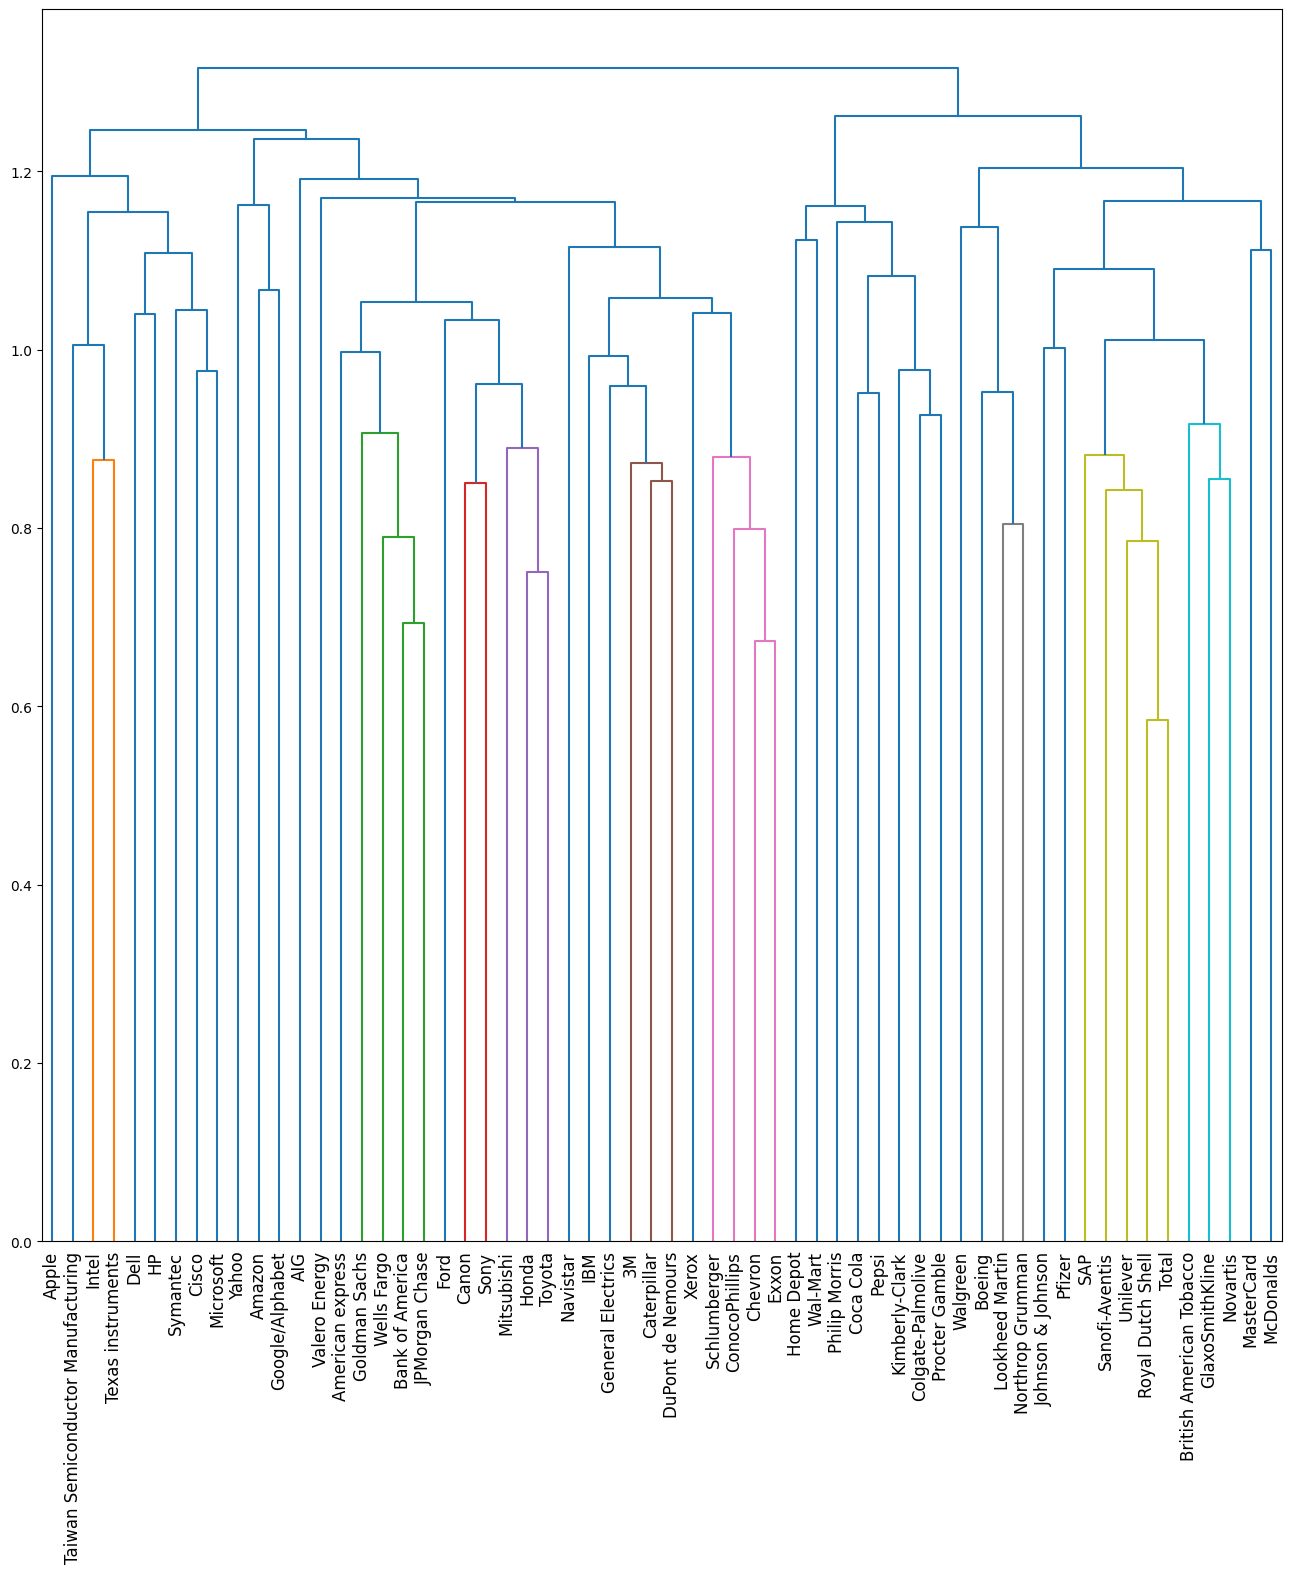

In [25]:
plt.figure(figsize=(16, 16))

dendrogram(
    mergings,
    labels=companies,
    leaf_rotation=90,
    leaf_font_size=12
)

plt.show()

## Cluster labels in heirarchical clustering

- Not only a visualization tool
- Cluster labels at any intermediate stage can be recovered
    - Can be used, as an example, in **cross-tabulations**

### Intermediate clustering and height on dendrogram

<img src='https://drive.google.com/uc?export=view&id=1SMNH373j2aN8o_Gi8l3p583LLdifqpBJ'/>

At hieght 15:

- Bulgaria, Cyprus and Greece are one cluster
- Armenia is in a cluster of it's own
- Moldova and Russia are in another cluster
- The height on a dendogram is the distance between merging clusters
    - Example: The cluster that contains only Cyprus and Greece has a height of about 7, so the distance betwen Cyrpus and Greece is about 7.
    - Note that this height is the maximum distance between merging clusters

### Distance between clusters

- Defined by a **linkage method**
- In our example, we used "complete" linkage where the distance between clusters is the maximimum distance between their samples
    - Different linkage methods result in different hierarchical clustering
    - In "single" linkage, the distance between clusters is the minimum distance

### Extracting cluster labels

- Use the `fcluster()` function

```python
from scipy.cluster.heirarchy imprt lingake, fcluster

mergings = linkage(samples, method='complete')
labels = fcluster(mergings, 15, criterion='distance')
print(labels)
```

### Aligning cluster labels with country names

```python
pairs = pd.DataFrame({'labels': labels, 'countries': country_names})

print(pairs.sort_values('labels'))
```

### Different linkage, different hierarchical clustering

In [26]:
samples = np.array([
[ 2., 12.,  0.,  0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0., 10.,  0.,  4.,  0.,
  5.,  7.,  0.,  0.,  3.,  0.,  6.,  0.] ,
[12.,  0.,  4.,  0.,  0.,  0.,  0.,  6.,  0.,  7.,  8.,  0.,  3.,  0.,  0.,  0.,  0.,  5.,
  1., 12.,  0.,  0.,  2.,  0., 10.,  0.] ,
[ 0., 12.,  3.,  0., 12., 10.,  0.,  0.,  0.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  6.,
  0.,  5.,  0.,  2.,  0.,  0.,  8.,  4.] ,
[ 0.,  3., 12.,  0.,  0.,  5.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
 12.,  8.,  4.,  0.,  7.,  6., 10.,  0.] ,
[ 0.,  2.,  0., 12.,  0.,  8.,  0.,  0.,  0.,  4.,  1.,  0.,  7.,  6.,  0.,  0.,  0.,  5.,
  3., 12.,  0.,  0.,  0.,  0., 10.,  0.] ,
[ 7.,  1.,  0.,  8.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  5.,  0.,  0.,
  6., 12.,  0.,  0.,  2.,  0., 10.,  0.] ,
[ 7.,  4.,  3.,  0., 12.,  5.,  0.,  0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
 12.,  6.,  0.,  0.,  1., 10.,  2.,  0.] ,
[ 0.,  3.,  5.,  8.,  0.,  2., 10.,  0.,  0.,  4.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
  0.,  6., 12.,  0.,  0.,  0.,  7.,  0.] ,
[ 8.,  5.,  4.,  1.,  0., 12.,  0.,  7.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,
  6., 12.,  0.,  0.,  3.,  0., 10.,  0.] ,
[ 0.,  5.,  6.,  0.,  0.,  1., 12.,  0.,  0.,  2.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,
  4.,  8., 12.,  0.,  7.,  0., 10.,  0.] ,
[ 8.,  5.,  0.,  0.,  0., 12.,  0., 12.,  0.,  6.,  0.,  0.,  4.,  0.,  0.,  0.,  3.,  0.,
  2., 10.,  0.,  0.,  1.,  0.,  7.,  0.] ,
[ 8.,  1.,  4.,  6.,  0.,  5.,  0.,  0., 12.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,
  7., 10.,  0.,  0.,  2.,  0., 12.,  0.] ,
[ 0., 10.,  1.,  0.,  8.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,
  5.,  4.,  0.,  0., 12.,  7.,  3.,  0.] ,
[ 0.,  4.,  6.,  0.,  0.,  0.,  0.,  3.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  7.,  5.,  0.,
  1., 12.,  0.,  0., 10.,  0.,  8.,  0.] ,
[ 7.,  3.,  0.,  0.,  4., 10.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
  2.,  8., 12.,  0.,  0.,  0.,  6.,  0.] ,
[ 0.,  7.,  6.,  0.,  0.,  4.,  0.,  1.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,
  5.,  8.,  0.,  0., 10.,  0., 12.,  0.] ,
[12.,  0.,  8.,  0.,  4.,  5.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,
  7.,  6.,  0.,  1.,  2.,  0., 10.,  0.] ,
[12.,  1.,  0.,  7.,  0.,  3.,  0.,  0.,  0.,  0., 12.,  0.,  2.,  0.,  0.,  6.,  5.,  0.,
  4.,  8.,  0.,  0.,  0.,  0., 10.,  0.] ,
[ 2.,  5.,  7.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  1.,  0.,  0.,  0.,
 10., 12.,  0.,  0.,  8.,  3.,  6.,  0.] ,
[ 8.,  5.,  1.,  0.,  0.,  7.,  0., 12.,  0.,  4.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,
  3., 10.,  0.,  0.,  0.,  0.,  6.,  0.] ,
[ 0.,  3.,  6.,  0.,  0.,  4.,  0.,  5.,  0.,  1.,  0.,  0., 12.,  0.,  0.,  0.,  0.,  0.,
  8., 10.,  0.,  0.,  7.,  2., 12.,  0.] ,
[ 0.,  8.,  2.,  1.,  3.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,
 10.,  7.,  0.,  0., 12.,  6.,  0.,  0.] ,
[ 0.,  6.,  1.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,
 10.,  8.,  0.,  0.,  2.,  0.,  4.,  3.] ,
[ 6.,  5.,  3.,  2.,  1.,  7.,  0.,  0.,  0., 12.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0.,
  4., 10.,  0.,  0.,  0.,  0.,  8.,  0.] ,
[ 1.,  0.,  0.,  0.,  0.,  7.,  0.,  6.,  0.,  5.,  3.,  0.,  0.,  0., 12.,  0.,  2.,  0.,
 10.,  8.,  4.,  0.,  0.,  0., 12.,  0.] ,
[ 0.,  6.,  4.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0., 12.,  8.,  0.,
  5., 12.,  0.,  0.,  7.,  0., 10.,  0.] ,
[ 0.,  5.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  4.,  0.,  2.,  0.,  0., 12., 12.,  0.,
  6.,  8.,  0.,  0.,  7.,  0., 10.,  0.] ,
[ 0., 12.,  0.,  6.,  0.,  8.,  0.,  0.,  0.,  2.,  0.,  0.,  5.,  0.,  7.,  0.,  0., 12.,
  0., 10.,  0.,  0.,  0.,  3.,  4.,  1.] ,
[ 7.,  5.,  4.,  8.,  0.,  2.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,  0.,
  0., 12.,  0.,  0.,  0.,  0., 10.,  0.] ,
[ 0.,  0.,  0.,  7.,  0.,  5.,  6.,  0.,  0.,  1.,  0.,  0.,  3.,  0.,  4.,  0.,  2.,  0.,
  0., 10., 12.,  0.,  0.,  0.,  8.,  0.] ,
[ 0.,  8.,  0.,  0.,  2.,  5.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 12.,  0.,
 10.,  6.,  0.,  0.,  7.,  0.,  4.,  0.] ,
[ 2.,  7.,  4.,  0.,  0.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  5.,  0.,  0.,
 12.,  8.,  0.,  0., 10.,  0., 12.,  0.] ,
[12.,  4.,  8.,  6.,  0.,  0.,  0.,  7.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
  5., 12.,  0.,  0.,  2.,  0., 10.,  0.] ,
[ 2.,  5.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  6.,  8.,  0.,
  7., 10.,  0.,  0.,  4.,  0., 12.,  0.] ,
[ 2.,  6.,  0.,  0.,  5.,  8.,  4.,  3.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  0.,
  0., 12., 12.,  0.,  1.,  0.,  7.,  0.] ,
[ 0.,  3.,  6.,  0.,  0.,  2.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
  4., 10., 12.,  0.,  5.,  0.,  7.,  0.] ,
[ 6.,  4.,  2.,  0.,  0., 12.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,
  5.,  8.,  0., 12.,  1.,  0.,  7.,  0.] ,
[ 0., 12.,  5.,  0.,  0.,  4.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,
 10.,  8.,  0.,  1., 12.,  2.,  7.,  0.] ,
[ 0.,  1., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  8.,  0.,  0.,  7.,  0.,  0.,  0.,
  5.,  6., 12.,  2.,  0.,  0.,  4.,  0.] ,
[ 8.,  5.,  6.,  0., 12.,  1.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
 10.,  3.,  0.,  0.,  2., 12.,  7.,  0.] ,
[ 7.,  4.,  0., 10.,  0.,  2.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,  5.,  3.,  0.,
  8., 12.,  0.,  0.,  1.,  0., 12.,  0.] ,
[ 0.,  6.,  0.,  0.,  0.,  8.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 12.,  0.,
 10.,  7.,  0.,  4.,  1.,  0.,  5., 12.]])

country_names = ['Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium',
                 'Bosnia & Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
                 'Estonia', 'F.Y.R. Macedonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece',
                 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Latvia', 'Lithuania', 'Malta',
                 'Moldova', 'Montenegro', 'Norway', 'Poland', 'Russia', 'San Marino', 'Serbia',
                 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'The Netherlands', 'Ukraine', 'United Kingdom']


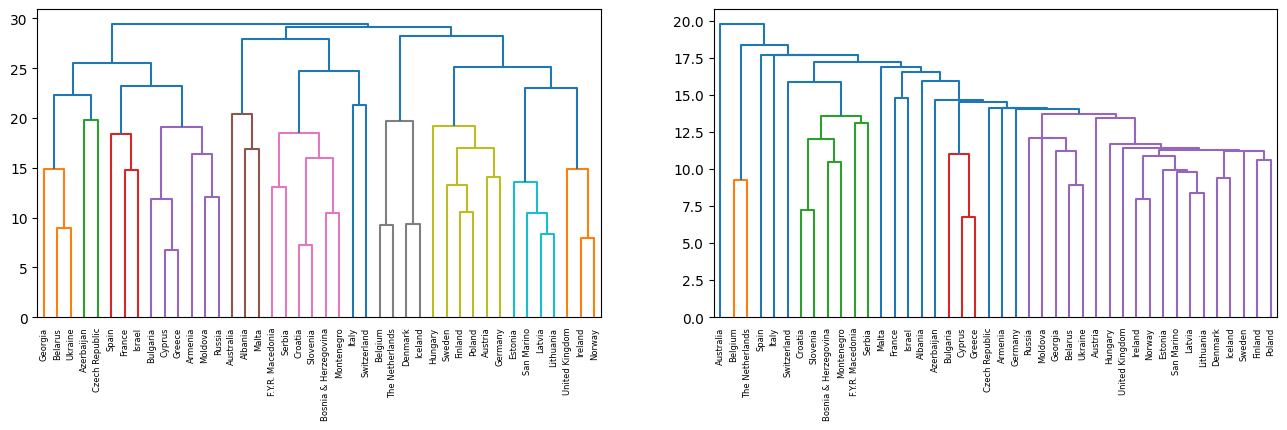

In [27]:
mergings_complete = linkage(samples, method='complete')
mergings_single = linkage(samples, method='single')

fig, axes = plt.subplots(1, 2, figsize=(16, 4))

dendrogram(mergings_complete,
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=6,
           ax=axes[0]
           )

dendrogram(mergings_single,
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=6,
           ax=axes[1]
           )

plt.show()

### Extracting the cluster labels

In [28]:
X = seeds.iloc[:, 0:-1].to_numpy()
y = seeds.iloc[:, -1].to_numpy()
_, samples, _, varieties = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
mapping = {1: 'Kama wheat', 2: 'Rosa wheat', 3: 'Canadian wheat'}
varieties = np.vectorize(mapping.get)(varieties)

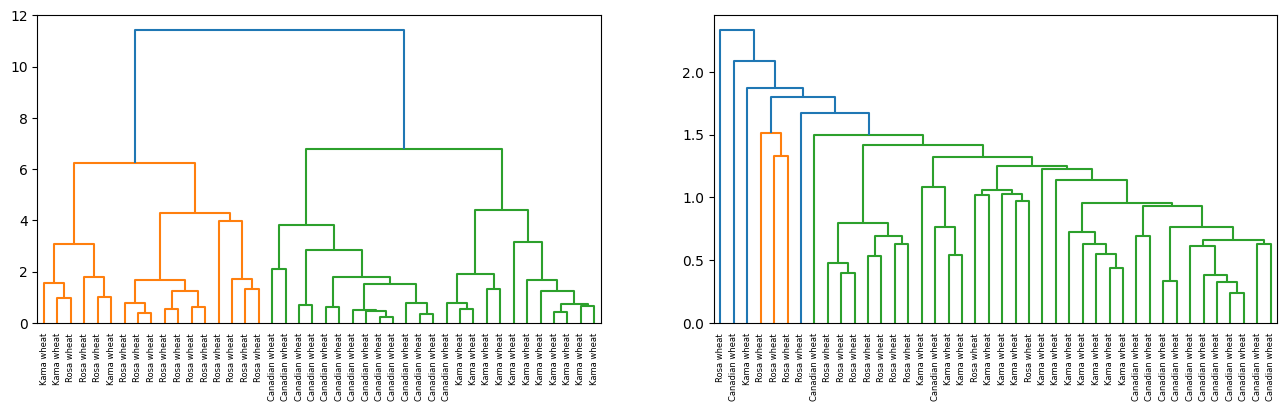

In [29]:
mergings_complete = linkage(samples, method='complete')
mergings_single = linkage(samples, method='single')

fig, axes = plt.subplots(1, 2, figsize=(16, 4))

dendrogram(mergings_complete,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           ax=axes[0]
           )

dendrogram(mergings_single,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           ax=axes[1]
           )

plt.show()

In [30]:
labels_complete = fcluster(mergings_complete, 6, criterion='distance')
print(len(np.unique(labels_complete)))
labels_complete

4


array([4, 3, 1, 3, 2, 3, 2, 1, 2, 2, 4, 3, 2, 2, 3, 4, 3, 4, 3, 1, 4, 3,
       1, 4, 2, 4, 4, 4, 3, 4, 3, 2, 4, 4, 3, 2, 1, 2, 3, 1, 3, 2],
      dtype=int32)

In [31]:
df = pd.DataFrame({'labels': labels_complete, 'varieties': varieties})
pd.crosstab(df['labels'], df['varieties'])

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
1,0,3,3
2,0,0,11
3,13,0,0
4,1,11,0


In [32]:
labels_single = fcluster(mergings_single, 2, criterion='distance')
print(len(np.unique(labels_single)))
labels_single

3


array([1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [33]:
df = pd.DataFrame({'labels': labels_single, 'varieties': varieties})
pd.crosstab(df['labels'], df['varieties'])

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
1,13,14,13
2,1,0,0
3,0,0,1


## t-SNE for 2-dimensional maps

- t-Distributed Stochastic Neighbor Embedding
- Maps samples to 2D (or 3D) space so they can be visualized
- Maps **approximately** preserves the nearness of samples

### t-SNE on the iris dataset

In [34]:
iris = pd.read_csv(data_base_url + '1Rqb4thhyLP1OZVvMamDdJ0EI1UQgIR44')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [35]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


- Iris dataset has 4 measurements, so samples are 4-dimensional
- t-SNE maps smaples to 2D space
- t-SNE didn't know that there were different species

### Interpreting t-SNE scatter plots

- "Versicolor" and "Virginica" are harder to distinguish from one another
- Consistent with k-means inertia plot: could argue for 2 clsuters or for 3

### t-SNE in sklearn

In [36]:
X = iris.drop('variety', axis=1)
y = iris['variety']

X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [37]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
encoder.inverse_transform(y_encoded)

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolo

In [39]:
# from sklearn.manifold import TSNE

# if all the samples are bunched together in
#. a scatter plot, try a new learning_rate
model = TSNE(learning_rate=100)
model

TSNE(learning_rate=100)

In [40]:
transformed = model.fit_transform(X)
transformed

array([[ 13.337736  ,  18.833061  ],
       [ 15.916124  ,  19.248434  ],
       [ 15.836995  ,  18.186625  ],
       [ 16.19445   ,  18.363039  ],
       [ 13.318111  ,  18.40735   ],
       [ 11.399068  ,  18.65039   ],
       [ 15.486806  ,  17.747366  ],
       [ 14.057549  ,  18.856476  ],
       [ 16.890434  ,  18.147165  ],
       [ 15.48062   ,  19.171986  ],
       [ 11.919901  ,  19.241453  ],
       [ 14.706218  ,  18.373589  ],
       [ 16.168766  ,  18.946878  ],
       [ 16.988413  ,  17.674717  ],
       [ 10.669121  ,  19.443615  ],
       [ 10.449139  ,  18.923542  ],
       [ 11.311633  ,  19.029129  ],
       [ 13.284632  ,  18.826876  ],
       [ 11.189862  ,  19.559624  ],
       [ 12.262777  ,  18.39586   ],
       [ 12.660234  ,  19.970057  ],
       [ 12.571073  ,  18.433004  ],
       [ 17.176424  ,  19.311756  ],
       [ 13.873382  ,  19.938843  ],
       [ 14.744102  ,  20.021973  ],
       [ 15.55241   ,  19.650917  ],
       [ 13.953558  ,  19.34855   ],
 

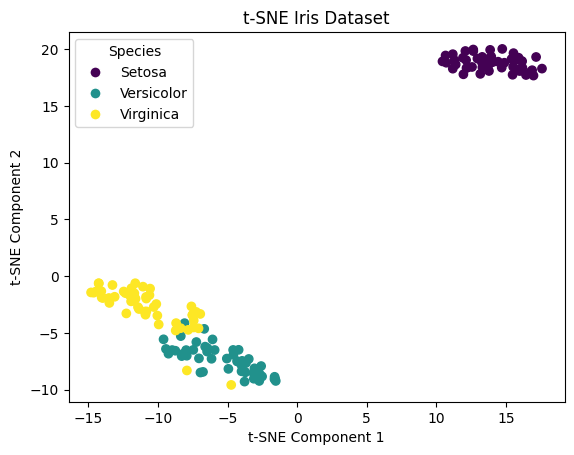

In [41]:
xs = transformed[:, 0]
ys = transformed[:, 1]

scatter = plt.scatter(xs, ys, c=y_encoded)

# Line2D creates a fake invisible line object, which we use as a legend entry
# [0], [0] are dummy coordinates, not used visuall, just needed to create the object
#. scatter.cmap retrives the colour from the colormap
# Create a legend using encoder.classes_
handles = [plt.Line2D([0], [0], marker="o", color="w", markerfacecolor=scatter.cmap(i / (len(encoder.classes_) - 1)), markersize=8)
           for i in range(len(encoder.classes_))]

plt.legend(handles, encoder.classes_, title='Species')
plt.title('t-SNE Iris Dataset')
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

plt.show()

### t-SNE visualization of grain dataset

In [42]:
samples = seeds.iloc[:, 0:-1].to_numpy()
variety = seeds.iloc[:, -1].to_numpy()
samples.shape, varieties.shape

((210, 7), (42,))

In [43]:
mapping = {1: 'Kama wheat', 2: 'Rosa wheat', 3: 'Canadian wheat'}

varieties = np.vectorize(mapping.get)(variety)
varieties[:10]

array(['Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat',
       'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat',
       'Kama wheat', 'Kama wheat'], dtype='<U14')

In [44]:
model = TSNE(learning_rate=200)
tsne_features = model.fit_transform(samples)
tsne_features

array([[ -0.15739788,   4.7268863 ],
       [ -2.7156425 ,   5.851066  ],
       [ -2.235791  ,   1.3496265 ],
       [ -3.8441806 ,   0.973996  ],
       [ -0.09494761,   6.897372  ],
       [ -2.1993277 ,   2.0099595 ],
       [  0.93629664,   0.85818905],
       [ -2.6567247 ,   0.76491845],
       [  2.2782984 ,   7.0124083 ],
       [  1.4914442 ,   6.8492494 ],
       [  4.616197  ,   1.9625652 ],
       [ -3.9380374 ,   2.8583791 ],
       [ -0.35106203,  -1.6288447 ],
       [ -2.1842074 ,  -0.65813094],
       [ -2.8091304 ,  -0.35270634],
       [  1.3626888 ,  -0.6992635 ],
       [ -4.173466  , -11.284565  ],
       [ -0.76270646,   6.2160583 ],
       [ -2.775188  ,   3.5676353 ],
       [ -6.2647486 ,  -7.585379  ],
       [ -1.0754884 ,   0.3994963 ],
       [ -1.937591  ,   0.94119555],
       [ -1.2621753 ,   7.145441  ],
       [ -8.603955  ,  -1.2554785 ],
       [ -1.662975  ,   5.064952  ],
       [ -0.49403685,   7.4244657 ],
       [ -5.2653327 ,  -4.1867223 ],
 

In [45]:
xs = tsne_features[:, 0]
ys = tsne_features[:, 1]

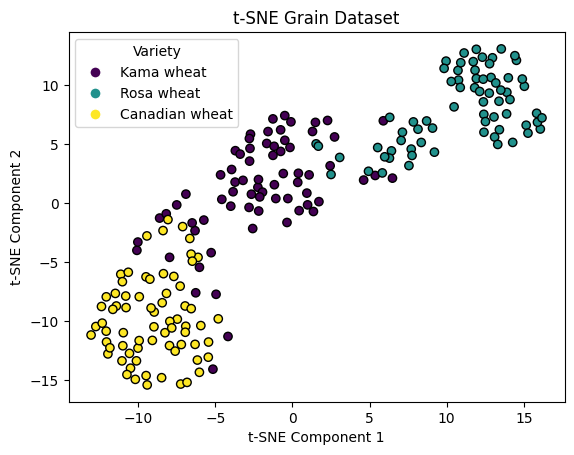

In [46]:
# ensure correct mapping
unique_varieties = list(mapping.values())
unique_variety_codes = list(mapping.keys())

plt.scatter(xs, ys, c=variety, edgecolor='k')
handles = [plt.Line2D([0], [0], marker="o", color="w",
           markerfacecolor=scatter.cmap(i / (len(unique_varieties) - 1)),
           markersize=8) for i in range(len(unique_varieties))]

plt.legend(handles, unique_varieties, title='Variety')
plt.title('t-SNE Grain Dataset')
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

### A t-SNE map of the stock market

In [47]:
model = TSNE(learning_rate=50)
model

TSNE(learning_rate=50)

In [48]:
tsne_features = model.fit_transform(normalized_movements)
tsne_features

array([[-1.6056781 , -3.320131  ],
       [ 0.9115967 , -2.004496  ],
       [-0.8539364 , -2.5436802 ],
       [ 1.4887154 , -3.2057114 ],
       [-1.2996264 , -5.3856153 ],
       [ 0.90046436, -2.9981062 ],
       [ 1.0724494 , -6.836293  ],
       [ 0.32003248, -4.5172095 ],
       [ 2.103228  , -5.186091  ],
       [-0.02805151, -8.708867  ],
       [ 2.3022828 , -6.092142  ],
       [ 2.6053567 , -3.8139791 ],
       [ 1.9438344 , -5.9288235 ],
       [ 1.7564204 , -5.017455  ],
       [ 4.101439  , -4.261011  ],
       [ 0.2812397 , -3.6916847 ],
       [ 1.2845092 , -4.291675  ],
       [-1.2042586 , -3.1140265 ],
       [ 0.77230614, -2.866584  ],
       [ 0.76522285, -6.58151   ],
       [-0.38552785, -5.7079883 ],
       [ 0.29916528, -4.536564  ],
       [ 4.2166457 , -4.158582  ],
       [ 2.3833082 , -4.7206154 ],
       [ 3.1025276 , -3.4783814 ],
       [-0.21767232, -7.598836  ],
       [ 0.97896045, -3.2028556 ],
       [-0.17730847, -8.755705  ],
       [ 0.9416681 ,

In [49]:
xs = tsne_features[:, 0]
ys = tsne_features[:, 1]

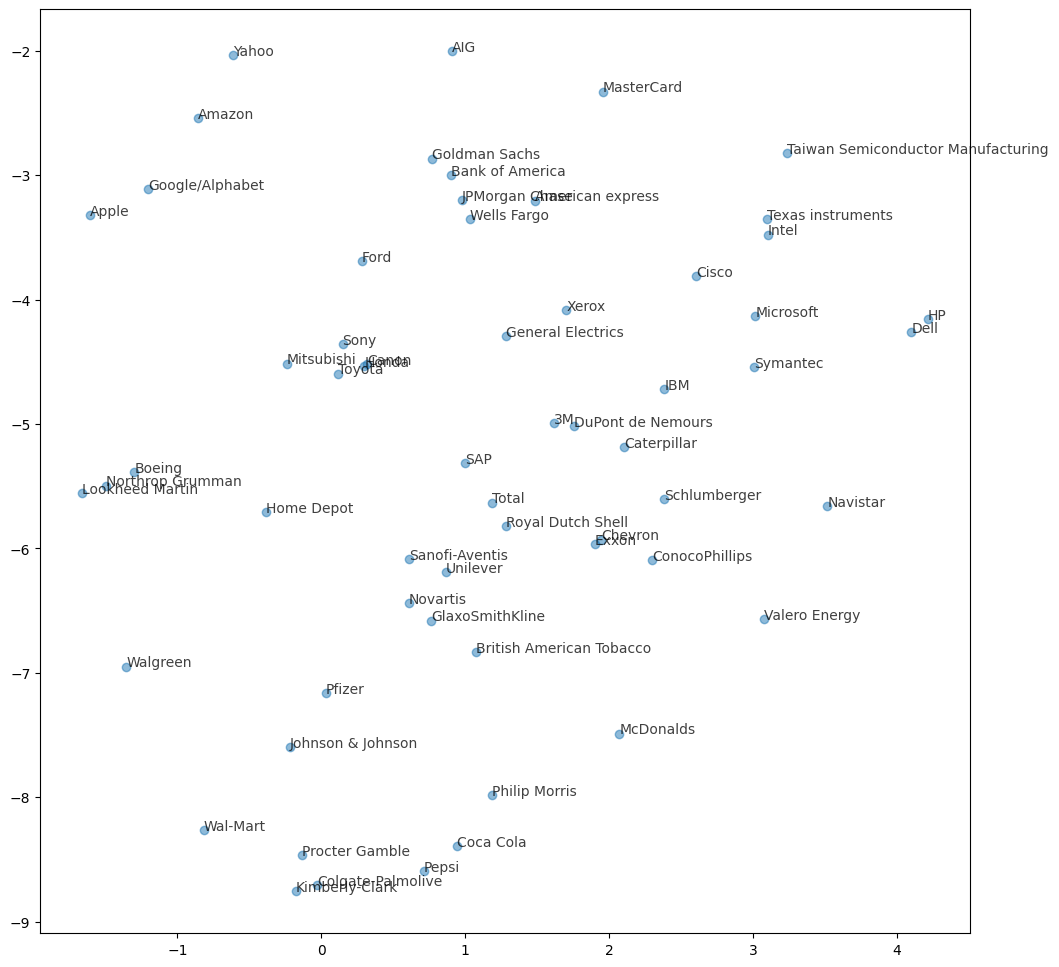

In [50]:
plt.figure(figsize=(12, 12))
plt.scatter(xs, ys, alpha=0.5)

for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=10, alpha=0.75)

plt.show()